In [71]:
#Lets Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import metrics
%matplotlib inline

In [50]:
#Read Data
fruit_data = pd.read_csv("../datasets/citrus.csv")
fruit_data.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [51]:
fruit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


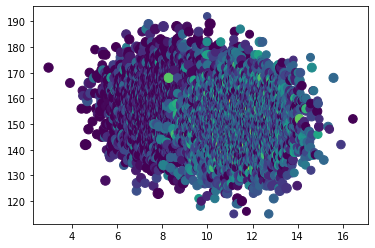

In [52]:
plt.scatter(fruit_data['diameter'], fruit_data['red'], fruit_data['green'], fruit_data['blue'])

In [53]:
fruit_data.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [54]:
fruit_data.corr()

,diameter,weight,red,green,blue
diameter,1.000000,0.999476,-0.217821,-0.396832,0.363307
weight,0.999476,1.000000,-0.214714,-0.392003,0.358916
red,-0.217821,-0.214714,1.000000,0.148937,-0.135900
green,-0.396832,-0.392003,0.148937,1.000000,-0.242495
blue,0.363307,0.358916,-0.135900,-0.242495,1.000000


In [55]:
fruit_data['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

In [56]:
# Currently Data is sorted based on name (Orane / Grapefruit) to get right prediction we need to randomize it.
fruit_data = fruit_data.sample(frac=1, random_state=40).reset_index(drop=True)


In [57]:
fruit_data.tail()

,name,diameter,weight,red,green,blue
9995,grapefruit,11.67,200.74,155,68,24
9996,orange,9.19,163.71,145,91,2
9997,grapefruit,10.42,180.41,155,70,26
9998,grapefruit,9.79,171.22,159,74,19
9999,grapefruit,11.51,198.48,141,79,26


In [58]:
#Now lets seperate out our features/Variable coumns and target column
features = fruit_data.drop(['name'], axis = 1)
target = fruit_data['name']

In [59]:
features.columns
#features.head()

Index(['diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [60]:
target.tail()

9995    grapefruit
9996        orange
9997    grapefruit
9998    grapefruit
9999    grapefruit
Name: name, dtype: object

In [62]:
#Before going into Model fitting, First we will convert Categorical values into Nuric Values - for Name Comun

name_labelProcessing = preprocessing.LabelEncoder()
target = name_labelProcessing.fit_transform(target)

In [66]:
target

array([1, 1, 0, ..., 0, 0, 0])

In [67]:
#Split Test and Train Data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state = 3)

# K-Means Model

## Evaluating Value of K using Elbow Method

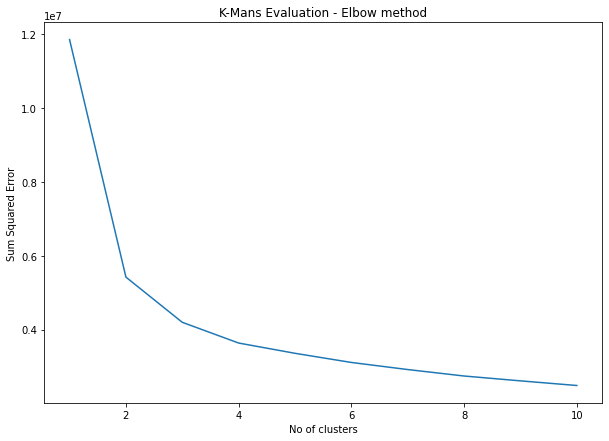

In [69]:
#We calculate SSE - Sum of Squared Error (distance of feature points from centroid)
x = features.values
Sum_Squared_Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    Sum_Squared_Error.append(kmeans.inertia_)
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(range(1, 11), Sum_Squared_Error)
plt.title('K-Mans Evaluation - Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Sum Squared Error')
plt.show()

#With below graph we can see the k- value should be 2

In [77]:
#Lets Predict cluster values
kmeans = KMeans(n_clusters=2)
y_predicted = kmeans.fit_predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))

Accuracy: 0.8933333333333333


In [80]:

print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_predicted))

Confusion Matrix: [[1350  171]
 [ 149 1330]]
